# Accidentes de Costa Rica

Elaborado por:
* Anthony Cascante
* Michael Yip
    
Fuente de datos:


... ... Contexto del Problema ... ...



# Descripcion del Problema

Dado un set de datos de accidentes de costa rica en un rango de año 2013 al 2017.



# Preprocesado

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('C:\\Users\\myip\\cosevi-accidentes\\accidentes_transito_cr.csv')

Dimensiones del dataset

In [2]:
df.shape

(70549, 22)

Inspeccion General

In [3]:
df.head(5)

,A_Accidente,Clase de accidente,Tipo de accidente,Año,Mes,Día,Hora,Hora recodificada,Provincia,Cantón,...,Kilómetro,Tipo ruta,Rural o urbano,Calzada vertical,Calzada horizontal,Tipo de calzada,Estado del tiempo,Tipo de circulación,Dia,Mes.1
0,1,Con muertos o graves,Salió de la vía,2015,Enero,Domingo,21,18:00-23:59,Puntarenas,Coto Brus,...,11,Nacional,Urbana,Desconocida,Curva,Asfalto,Oscuro,Objeto Fijo,1.Domingo,A. Enero
1,1,Solo heridos leves,Colisión con objeto fijo,2013,Marzo,Domingo,5,00:00-05:59,San José,San José,...,0,Nacional,Urbana,Pendiente,Curva,Asfalto,Buen tiempo,Desconocido,1.Domingo,C. Marzo
2,1,Solo heridos leves,Vuelco,2013,Febrero,Miércoles,12,12:00-17:59,San José,Puriscal,...,18,Nacional,Rural,Pendiente,Curva,Asfalto,Buen tiempo,Lateral en sentido contrario,4.Miércoles,B. Febrero
3,1,Solo heridos leves,Colisión con motocicleta,2013,Febrero,Miércoles,17,12:00-17:59,San José,Mora,...,2,Nacional,Urbana,Plano,Recta,Asfalto,Buen tiempo,Angulo recto,4.Miércoles,B. Febrero
4,1,Solo heridos leves,Atropello a persona,2013,Marzo,Miércoles,7,06:00-11:59,San José,Mora,...,15,Nacional,Rural,Plano,Recta,Asfalto,Buen tiempo,Desconocido,4.Miércoles,C. Marzo


Nombre de las columnas enteras

In [4]:
df.columns

Index(['A_Accidente', 'Clase de accidente', 'Tipo de accidente', 'Año', 'Mes',
       'Día', 'Hora', 'Hora recodificada', 'Provincia', 'Cantón', 'Distrito',
       'Ruta', 'Kilómetro', 'Tipo ruta', 'Rural o urbano', 'Calzada vertical',
       'Calzada horizontal', 'Tipo de calzada', 'Estado del tiempo',
       'Tipo de circulación', 'Dia', 'Mes.1'],
      dtype='object')

Tipo de dato de las columnas

In [5]:
df.dtypes

A_Accidente             int64
Clase de accidente     object
Tipo de accidente      object
Año                     int64
Mes                    object
Día                    object
Hora                    int64
Hora recodificada      object
Provincia              object
Cantón                 object
Distrito               object
Ruta                   object
Kilómetro              object
Tipo ruta              object
Rural o urbano         object
Calzada vertical       object
Calzada horizontal     object
Tipo de calzada        object
Estado del tiempo      object
Tipo de circulación    object
Dia                    object
Mes.1                  object
dtype: object

Se usa la columna **Clase de accidente** para realizar la clasificacion.

In [6]:
# import matplotlib.pyplot as plt
# %matplotlib inline
# plt.style.use('ggplot')

# x = df['Tipo de accidente'].value_counts().index.tolist()
# energy = df['Tipo de accidente'].value_counts()

# x_pos = [i for i, _ in enumerate(x)]

# plt.barh(x_pos, energy, color='green')
# plt.xlabel("Energy Source")
# plt.ylabel("Energby Output (GJ)")
# plt.title("Energy output from various fuel sources")

# plt.xticks(x_pos, x)

# plt.show()

---

## Analisis de campos

Se procede a realizar un conteo de los diferentes valores que aparecen en el dataset, asi observar la consistencia de los mismos. 

In [7]:
df['A_Accidente'].value_counts()

1    70549
Name: A_Accidente, dtype: int64

In [8]:
df['Clase de accidente'].value_counts()

Solo heridos leves      59101
Con muertos o graves    11448
Name: Clase de accidente, dtype: int64

In [9]:
df['Tipo de accidente'].value_counts()
#df[df['Tipo de accidente'] != 'Otros'].shape

Colisión con motocicleta    27484
Colisión entre vehículos    13899
Atropello a persona         10006
Vuelco                       5042
Salió de la vía              5042
Colisión con bicicleta       4651
Colisión con objeto fijo     2118
Otros                         863
Caída de algún ocupante       676
Atropello animal              641
Objeto sobre vehículo         127
Name: Tipo de accidente, dtype: int64

In [10]:
df['Año'].value_counts()

2016    16037
2017    14861
2015    14050
2014    13025
2013    12576
Name: Año, dtype: int64

In [11]:
df['Mes'].value_counts()
#pd.get_dummies(df['Mes'], prefix = 'category')

Diciembre    6533
Octubre      6145
Marzo        6083
Noviembre    6075
Agosto       5880
Julio        5839
Setiembre    5812
Mayo         5781
Abril        5744
Enero        5570
Junio        5554
Febrero      5533
Name: Mes, dtype: int64

In [12]:
df['Día'].value_counts()

Sábado       11172
Viernes      10709
Lunes        10296
Domingo       9786
Miércoles     9593
Jueves        9533
Martes        9460
Name: Día, dtype: int64

In [13]:
df['Hora'].value_counts()

18    4859
19    4754
7     4481
17    4390
15    4296
16    4270
12    3786
20    3782
8     3645
13    3547
11    3380
14    3193
10    3184
9     2959
6     2799
21    2754
23    2198
22    2023
0     1422
5     1226
1     1094
2      866
3      825
4      816
Name: Hora, dtype: int64

In [14]:
df['Hora recodificada'].value_counts()
#pd.get_dummies(df['Hora recodificada'], prefix = 'category')

12:00-17:59    23482
06:00-11:59    20448
18:00-23:59    20369
00:00-05:59     6250
Name: Hora recodificada, dtype: int64

In [15]:
df['Provincia'].value_counts()

San José      26145
Alajuela      13961
Heredia        8108
Puntarenas     6549
Cartago        5851
Limón          5474
Guanacaste     4461
Name: Provincia, dtype: int64

In [16]:
pd.set_option('display.max_rows', 500)
df['Cantón'].value_counts()

San José               9033
Alajuela               6015
Heredia                3258
Desamparados           2688
Pérez Zeledón          2444
Cartago                2391
Pococí                 2246
Puntarenas             2161
Goicoechea             2022
San Carlos             1689
San Ramón              1363
Escazú                 1344
Sarapiquí              1309
Grecia                 1214
Santa Ana              1191
Curridabat             1183
Montes de Oca          1138
Limón                  1135
Tibás                  1096
Nicoya                  951
Turrialba               936
Santo Domingo           879
La Unión                867
Siquirres               854
Liberia                 845
Moravia                 835
Esparza                 779
Santa Cruz              733
Naranjo                 719
Belén                   677
Vázquez de Coronado     630
Orotina                 624
Paraíso                 601
Garabito                599
Aserrí                  592
Osa                 

In [17]:
pd.set_option('display.max_rows', 500)
df['Distrito'].value_counts()


San Rafael                      2467
Alajuela                        1713
Uruca                           1380
San Antonio                     1370
Heredia                         1262
Hospital                        1214
San Pedro                       1115
Guápiles                        1051
Catedral                        1034
San Isidro de El General        1029
San Juan                        1025
San José                         993
San Isidro                       987
Pavas                            971
San Francisco                    970
Guadalupe                        966
Ulloa                            959
Desamparados                     952
San Sebastián                    905
San Miguel                       883
Hatillo                          830
Curridabat                       826
Limón                            794
San Nicolás                      757
Río Segundo                      753
Liberia                          720
Merced                           712
S

In [63]:
pd.set_option('display.max_rows', 500)
df['Ruta'].value_counts()

Cantonal    23019
1            3881
2            3791
3            2290
32           2138
209          1351
27           1326
39           1203
10           1124
34           1023
218           964
4             949
17            830
21            808
104           611
141           588
247           577
124           523
118           518
239           503
102           493
214           492
5             453
108           447
Ignorada      447
126           435
121           402
215           371
35            351
36            327
105           320
111           314
147           297
202           293
23            288
110           286
150           276
206           271
122           265
135           259
106           258
160           252
123           251
219           250
702           247
243           240
142           239
415           236
210           228
140           226
310           217
211           213
249           212
154           212
228           207
177       

In [60]:
pd.set_option('display.max_rows', 500)
df['Kilómetro'].value_counts()

0            16122
Cantonal     12274
1             4301
2             3897
3             2911
4             2563
5             1981
6             1714
7             1516
8             1265
9              888
Ignorado       851
10             823
14             675
12             656
11             631
13             612
17             518
20             473
15             468
16             445
22             433
18             430
21             424
19             423
25             340
23             288
24             261
26             261
30             248
31             225
37             223
27             219
32             181
135            180
42             164
35             163
38             154
34             154
33             154
44             153
136            150
28             149
36             147
43             146
39             138
29             135
49             135
52             133
41             127
137            126
62             124
50          

In [20]:
df['Tipo ruta'].value_counts()

Nacional                   46667
Cantonal                   23020
Ignorada                     448
Nacional sin coordenada      414
Name: Tipo ruta, dtype: int64

In [21]:
df['Rural o urbano'].value_counts()

Urbana         55093
Rural          14594
Desconocida      862
Name: Rural o urbano, dtype: int64

In [22]:
df['Calzada vertical'].value_counts()

Plano          53448
Pendiente      15414
Desconocida     1687
Name: Calzada vertical, dtype: int64

In [23]:
df['Calzada horizontal'].value_counts()
# Desconocido se puede cambiar por otro

Recta          28282
Cruce          17085
Desconocida    15618
Curva           8117
Otro            1158
Rotonda          289
Name: Calzada horizontal, dtype: int64

In [24]:
df['Tipo de calzada'].value_counts()
# Desconocido se puede cambiar por otro

Asfalto        64336
Lastre          2707
Concreto        2079
Desconocida      812
Adoquin          226
Tierra           197
Otros            192
Name: Tipo de calzada, dtype: int64

In [25]:
df['Estado del tiempo'].value_counts()
# Desconocido se puede cambiar por otro

Buen tiempo        49309
Despejado           8164
Lluvia escasa       4418
Oscuro              3319
Lluvia mediana      2683
Lluvia intensa      1114
Desconocido          939
Neblina escasa       273
Neblina intensa      154
Otro                 105
Neblina media         71
Name: Estado del tiempo, dtype: int64

In [26]:
df['Tipo de circulación'].value_counts()

De frente                       15361
De Costado                      14686
Angulo recto                    14561
Por detrás                       8402
Otro                             7023
Desconocido                      6208
Lateral igual sentido            2392
Lateral en sentido contrario     1381
Objeto Fijo                       535
Name: Tipo de circulación, dtype: int64

In [27]:
df['Dia'].value_counts()

7.Sábado       11172
6.Viernes      10709
2.Lunes        10296
1.Domingo       9786
4.Miércoles     9593
5.Jueves        9533
3.Martes        9460
Name: Dia, dtype: int64

In [28]:
df['Mes.1'].value_counts()

L. Diciembre    6533
J. Octubre      6145
C. Marzo        6083
K. Noviembre    6075
H. Agosto       5880
G. Julio        5839
I. Setiembre    5812
E. Mayo         5781
D. Abril        5744
A. Enero        5570
F. Junio        5554
B. Febrero      5533
Name: Mes.1, dtype: int64

---





## Datos Desbalanceados

Se presenta una mayor porcion de la clase **Solo heridos leves** que **Con muertos o graves**




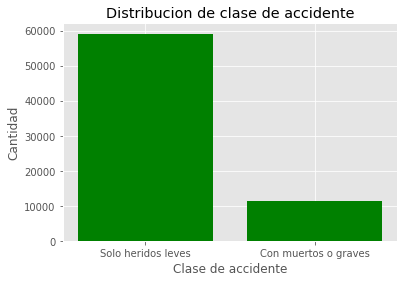

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

clase = df['Clase de accidente'].value_counts().index.tolist()
cantidad = df['Clase de accidente'].value_counts()

clase_pos = [i for i, _ in enumerate(clase)]

plt.bar(clase_pos, cantidad, color='green')
plt.xlabel("Clase de accidente")
plt.ylabel("Cantidad")
plt.title("Distribucion de clase de accidente")

plt.xticks(clase_pos, clase)

plt.show()

## Columnas Irrelevantes

En una primera inspeccion se observa que la columna **A_Accidente** es irrelevante ya que todos sus valores son 1.
Las columnas **Dia** y **Mes.1** poseen valores que están en las columnas **Día** y **Mes** respectivamente.

Se eliminan las columnas mencionadas.

In [30]:
df.drop(['A_Accidente', 'Dia', 'Mes.1'], axis=1, inplace=True)
df

,Clase de accidente,Tipo de accidente,Año,Mes,Día,Hora,Hora recodificada,Provincia,Cantón,Distrito,Ruta,Kilómetro,Tipo ruta,Rural o urbano,Calzada vertical,Calzada horizontal,Tipo de calzada,Estado del tiempo,Tipo de circulación
0,Con muertos o graves,Salió de la vía,2015,Enero,Domingo,21,18:00-23:59,Puntarenas,Coto Brus,Sabalito,617,11,Nacional,Urbana,Desconocida,Curva,Asfalto,Oscuro,Objeto Fijo
1,Solo heridos leves,Colisión con objeto fijo,2013,Marzo,Domingo,5,00:00-05:59,San José,San José,Hospital,214,0,Nacional,Urbana,Pendiente,Curva,Asfalto,Buen tiempo,Desconocido
2,Solo heridos leves,Vuelco,2013,Febrero,Miércoles,12,12:00-17:59,San José,Puriscal,San Antonio,239,18,Nacional,Rural,Pendiente,Curva,Asfalto,Buen tiempo,Lateral en sentido contrario
3,Solo heridos leves,Colisión con motocicleta,2013,Febrero,Miércoles,17,12:00-17:59,San José,Mora,Colón,22,2,Nacional,Urbana,Plano,Recta,Asfalto,Buen tiempo,Angulo recto
4,Solo heridos leves,Atropello a persona,2013,Marzo,Miércoles,7,06:00-11:59,San José,Mora,Guayabo,239,15,Nacional,Rural,Plano,Recta,Asfalto,Buen tiempo,Desconocido
5,Solo heridos leves,Colisión con objeto fijo,2013,Junio,Sábado,22,18:00-23:59,San José,Desamparados,Damas,212,1,Nacional,Urbana,Plano,Recta,Asfalto,Desconocido,Otro
6,Solo heridos leves,Colisión con objeto fijo,2013,Agosto,Sábado,23,18:00-23:59,San José,San José,San Sebastián,39,7,Nacional,Urbana,Desconocida,Desconocida,Asfalto,Oscuro,Objeto Fijo
7,Solo heridos leves,Atropello a persona,2013,Febrero,Miércoles,8,06:00-11:59,San José,Desamparados,San Cristóbal,222,20,Nacional,Rural,Plano,Recta,Asfalto,Despejado,De frente
8,Solo heridos leves,Colisión con motocicleta,2013,Febrero,Martes,22,18:00-23:59,San José,Alajuelita,San Felipe,177,2,Nacional,Urbana,Desconocida,Cruce,Asfalto,Oscuro,Desconocido
9,Solo heridos leves,Colisión con motocicleta,2013,Febrero,Miércoles,13,12:00-17:59,San José,San José,Hospital,Cantonal,Cantonal,Cantonal,Urbana,Desconocida,Cruce,Asfalto,Despejado,Angulo recto


In [31]:
df.shape

(70549, 19)

---

## Datos Faltantes

Se tienen campos donde no precisa su categoria exacta. Como lo son los valores: Desconocido, otro, ignorado, etc. alrededor del las diferentes columnas del dataset.




Una primera estrategia consiste en eliminar por completos estos datos. 

Una segunda estrategia consiste en eliminar la columna con el mayor numero de estos valores desconocidos presentados.

En el caso de la columna **Kilómetro** se presenta valores *Ignorado* y valores que no son consistentes con los demas datos y con su naturaleza de columna, numeros con escala de porcentajes (%). Para este caso se contabiliza, y se puede abordar de dos formas.
* Eliminar los datos (son alrededor de 75 filas que presentan este tipo de dato)
* Reemplazarlo por 0, el cual significa que se pierde precision de ubicacion sobre la ruta.

In [59]:
num = 0
non_num = 0
for k in df['Kilómetro'].drop_duplicates():
    try:
        int(k)
        num += 1
    except ValueError:
        #print(k)b
        non_num += 1
print("-------------------------------")
print('Total de datos numericos   ', num)
print('Total de datos no numericos', non_num)

-------------------------------
Total de datos numericos    343
Total de datos no numericos 76


In [50]:
df_0 = (df.replace('Desconocida', np.nan)
        .replace('Desconocido', np.nan)
        .replace('Otro', np.nan)
        .replace('Ignorada', np.nan)
        .replace('Ignorado', np.nan)
       )


df_0.shape

(70549, 19)

In [69]:
df_0['Kilómetro'].drop_duplicates()
xxxx = df_0['Kilómetro'].replace('(.*)%', np.nan, regex=True)
xxxx


0              11
1               0
2              18
3               2
4              15
5               1
6               7
7              20
8               2
9        Cantonal
10              0
11       Cantonal
12              1
13       Cantonal
14              6
15              8
16              3
17              9
18              2
19             19
20       Cantonal
21              1
22              1
23              8
24              0
25              4
26              0
27             17
28       Cantonal
29              0
30              2
31              5
32              2
33              6
34              5
35              1
36              8
37       Cantonal
38       Cantonal
39              2
40              1
41       Cantonal
42              1
43              1
44            NaN
45       Cantonal
46              2
47              3
48              2
49              4
50       Cantonal
51              2
52       Cantonal
53              1
54              0
55        

In [51]:
df_0_with_nan = df_0[df_0.isna().any(axis=1)]
df_0_with_nan.shape

(26744, 19)

In [52]:
df_0_with_nan.isna().sum()

Clase de accidente         0
Tipo de accidente          0
Año                        0
Mes                        0
Día                        0
Hora                       0
Hora recodificada          0
Provincia                  0
Cantón                     0
Distrito                   0
Ruta                     447
Kilómetro                851
Tipo ruta                448
Rural o urbano           862
Calzada vertical        1687
Calzada horizontal     16776
Tipo de calzada          812
Estado del tiempo       1044
Tipo de circulación    13231
dtype: int64

In [35]:
df_0 = df_0.dropna()
df_0.shape

(43805, 19)

In [36]:
43805 + 26744

70549

In [37]:
df_0['Clase de accidente'].value_counts()

Solo heridos leves      36376
Con muertos o graves     7429
Name: Clase de accidente, dtype: int64

In [38]:
df_0

,Clase de accidente,Tipo de accidente,Año,Mes,Día,Hora,Hora recodificada,Provincia,Cantón,Distrito,Ruta,Kilómetro,Tipo ruta,Rural o urbano,Calzada vertical,Calzada horizontal,Tipo de calzada,Estado del tiempo,Tipo de circulación
2,Solo heridos leves,Vuelco,2013,Febrero,Miércoles,12,12:00-17:59,San José,Puriscal,San Antonio,239,18,Nacional,Rural,Pendiente,Curva,Asfalto,Buen tiempo,Lateral en sentido contrario
3,Solo heridos leves,Colisión con motocicleta,2013,Febrero,Miércoles,17,12:00-17:59,San José,Mora,Colón,22,2,Nacional,Urbana,Plano,Recta,Asfalto,Buen tiempo,Angulo recto
7,Solo heridos leves,Atropello a persona,2013,Febrero,Miércoles,8,06:00-11:59,San José,Desamparados,San Cristóbal,222,20,Nacional,Rural,Plano,Recta,Asfalto,Despejado,De frente
12,Solo heridos leves,Atropello a persona,2013,Junio,Lunes,21,18:00-23:59,San José,San José,San Sebastián,214,1,Nacional,Urbana,Plano,Recta,Asfalto,Buen tiempo,Angulo recto
15,Con muertos o graves,Colisión con motocicleta,2013,Febrero,Domingo,6,06:00-11:59,San José,Aserrí,Aserrí,209,8,Nacional,Urbana,Pendiente,Recta,Asfalto,Buen tiempo,De frente
17,Solo heridos leves,Colisión con bicicleta,2013,Julio,Martes,10,06:00-11:59,San José,Curridabat,Sánchez,2,9,Nacional,Urbana,Plano,Recta,Asfalto,Buen tiempo,Lateral igual sentido
20,Solo heridos leves,Colisión con motocicleta,2013,Julio,Domingo,12,12:00-17:59,San José,San José,Hospital,Cantonal,Cantonal,Cantonal,Urbana,Pendiente,Recta,Asfalto,Buen tiempo,Angulo recto
21,Solo heridos leves,Atropello a persona,2013,Setiembre,Lunes,6,06:00-11:59,San José,San José,Mata Redonda,27,1,Nacional,Urbana,Plano,Recta,Concreto,Buen tiempo,Lateral en sentido contrario
25,Solo heridos leves,Atropello a persona,2013,Julio,Martes,23,18:00-23:59,San José,Goicoechea,Ipís,218,4,Nacional,Urbana,Pendiente,Recta,Asfalto,Buen tiempo,Angulo recto
29,Con muertos o graves,Colisión entre vehículos,2013,Julio,Lunes,0,00:00-05:59,San José,San José,Catedral,175,0,Nacional,Urbana,Plano,Recta,Asfalto,Buen tiempo,Por detrás


In [39]:
df_0_X = df_0.iloc[:, 2]
df_0_X

2        2013
3        2013
7        2013
12       2013
15       2013
17       2013
20       2013
21       2013
25       2013
29       2013
32       2013
47       2013
48       2014
49       2014
50       2013
52       2013
61       2013
63       2013
69       2013
72       2013
73       2013
79       2013
80       2013
94       2013
109      2013
110      2013
112      2013
114      2013
115      2013
116      2013
117      2013
118      2013
120      2013
125      2013
128      2013
131      2013
132      2014
136      2013
137      2013
138      2013
141      2013
143      2013
144      2013
149      2013
159      2013
162      2013
164      2013
169      2013
171      2013
174      2013
177      2017
180      2013
183      2013
187      2013
191      2013
197      2013
198      2013
207      2013
215      2013
219      2013
222      2013
225      2013
229      2013
232      2013
235      2013
236      2013
238      2013
240      2013
242      2013
244      2013
245      2013
247   

In [40]:
set1 = df[
    ['Tipo de accidente', 
     'Año', 
     'Mes', 
     'Hora recodificada',
     'Provincia', 
     'Tipo ruta', 
     'Rural o urbano', 
     'Calzada vertical',
     'Calzada horizontal', 
     'Tipo de calzada', 
     'Estado del tiempo',
     'Tipo de circulación']
]
set1_ohe = pd.DataFrame()

for feature in set1:
    onehot_features = pd.get_dummies(df[feature])
    set1_ohe = pd.concat([set1_ohe, onehot_features], axis=1)

set1_ohe.shape

(70549, 82)

In [41]:
#data.groupby(['month']).groups.keys()

df.groupby(['Año', 'Clase de accidente'])['Clase de accidente'].count()
df.groupby(['Estado del tiempo', 'Clase de accidente'])['Clase de accidente'].count()


Estado del tiempo  Clase de accidente  
Buen tiempo        Con muertos o graves     8247
                   Solo heridos leves      41062
Desconocido        Con muertos o graves      152
                   Solo heridos leves        787
Despejado          Con muertos o graves      965
                   Solo heridos leves       7199
Lluvia escasa      Con muertos o graves      710
                   Solo heridos leves       3708
Lluvia intensa     Con muertos o graves      238
                   Solo heridos leves        876
Lluvia mediana     Con muertos o graves      417
                   Solo heridos leves       2266
Neblina escasa     Con muertos o graves       35
                   Solo heridos leves        238
Neblina intensa    Con muertos o graves       34
                   Solo heridos leves        120
Neblina media      Con muertos o graves       12
                   Solo heridos leves         59
Oscuro             Con muertos o graves      609
                   Solo herid

In [42]:
sety1 =  pd.get_dummies(df['Clase de accidente'])
sety1.shape

(70549, 2)

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(set1_ohe, sety1, random_state=17) 

In [44]:
from sklearn.tree import DecisionTreeClassifier

DecisionTreeModel = DecisionTreeClassifier(max_depth = 7)
DecisionTreeModel.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [45]:
from sklearn.metrics import accuracy_score

y_predict = DecisionTreeModel.predict(X_test)
dt1 = accuracy_score(y_test, y_predict)
dt1



0.8380201836942964

In [46]:
# from sklearn.ensemble import RandomForestClassifier

# RandomForestModel = RandomForestClassifier(min_samples_leaf=3,min_samples_split=20,n_estimators=500, max_depth= None, random_state=10)
# RandomForestModel.fit(X_train, y_train)

In [47]:
# y_predict = RandomForestModel.predict(X_test)
# rf = accuracy_score(y_test,y_predict)
# rf

In [48]:
# importances = pd.DataFrame({'feature' : X_train.columns, 'importance':RandomForestModel.feature_importances_})
# importances = importances.sort_values('importance', ascending = False).set_index('feature')
# importances.head(9)

In [49]:
# to do